## Gold Purification from Gold Ore

We want to prepare a prototype of a machine learning model for Zyfra. The company develops efficiency solutions for heavy industry.
The model to be developed would be used to predict the amount of gold recovered from gold ore. We have data on extraction and purification consisting of the parameters measured during the purification process of gold ore, such as: concentration level at different stages, bank levels and others. We will be predicting the concentrations of gold after the first and final stages of purification.


## Data description

**Technological process**
- `Rougher feed:` raw material
- `Rougher additions (or reagent additions):` flotation reagents: Xanthate, Sulphate, Depressant
    * Xanthate: promoter or flotation activator
    * Sulphate: sodium sulphide for this particular process
    * Depressant: sodium silicate.
- `Rougher process:` flotation
- `Rougher tails:` product residues
- `Float banks:` flotation unit
- `Cleaner process:` purification
- `Rougher Au:` rougher gold concentrate
- `Final Au:` final gold concentrate

**Parameters of stages**
- `air amount:`volume of air
- `fluid levels`
- `feed size:` feed particle size
- `feed rate`
- `Feature naming`

**Stage Values**
- `rougher:` flotation
- `primary_cleaner:`primary purification
- `secondary_cleaner:`  secondary purification
- `final:` — final characteristics

**Parameter_type Values**
- `input:` raw material parameters
- `output:` product parameters
- `state:` parameters characterizing the current state of the stage
- `calculation:` calculation characteristics



## Table of Contents

- General Information
- Data Analysis
- Model Building
- Conclusion

## General Information

Importing the necessary libraries

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.utils import shuffle 
from sklearn.metrics import f1_score 
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

Loading the various datasets

In [28]:
gold_rec_train = pd.read_csv("/datasets/gold_recovery_train.csv", index_col = 'date')

gold_rec_test = pd.read_csv("/datasets/gold_recovery_test.csv", index_col = 'date')

gold_rec_full = pd.read_csv("/datasets/gold_recovery_full.csv", index_col = 'date')

Exploring each dataset

In [29]:
gold_rec_train.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [30]:
gold_rec_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16860 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         16788 non-null  float64
 1   final.output.concentrate_pb                         16788 non-null  float64
 2   final.output.concentrate_sol                        16490 non-null  float64
 3   final.output.concentrate_au                         16789 non-null  float64
 4   final.output.recovery                               15339 non-null  float64
 5   final.output.tail_ag                                16794 non-null  float64
 6   final.output.tail_pb                                16677 non-null  float64
 7   final.output.tail_sol                               16715 non-null  float64
 8   final.output.tail_au                             

The training dataset has 18860 rows. We also observe missing values in some columns

In [31]:
gold_rec_test.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [32]:
gold_rec_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5856 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5554 non-null   float64
 1   primary_cleaner.input.depressant            5572 non-null   float64
 2   primary_cleaner.input.feed_size             5856 non-null   float64
 3   primary_cleaner.input.xanthate              5690 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5840 non-null

The test dataset has 5840 rows. There are missing values in some columns in the dataset


In [33]:
gold_rec_full.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [34]:
gold_rec_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22716 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         22627 non-null  float64
 1   final.output.concentrate_pb                         22629 non-null  float64
 2   final.output.concentrate_sol                        22331 non-null  float64
 3   final.output.concentrate_au                         22630 non-null  float64
 4   final.output.recovery                               20753 non-null  float64
 5   final.output.tail_ag                                22633 non-null  float64
 6   final.output.tail_pb                                22516 non-null  float64
 7   final.output.tail_sol                               22445 non-null  float64
 8   final.output.tail_au                             

The complete dataset has 86 columns, 18860 rows. The columns in the dataset have some missing values.

## Calculating the rougher output recovery

To perform the calculation, we first take out all the null values

In [35]:
gold_rec_train_dropna = gold_rec_train.dropna()

gold_rec_train_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11017 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         11017 non-null  float64
 1   final.output.concentrate_pb                         11017 non-null  float64
 2   final.output.concentrate_sol                        11017 non-null  float64
 3   final.output.concentrate_au                         11017 non-null  float64
 4   final.output.recovery                               11017 non-null  float64
 5   final.output.tail_ag                                11017 non-null  float64
 6   final.output.tail_pb                                11017 non-null  float64
 7   final.output.tail_sol                               11017 non-null  float64
 8   final.output.tail_au                             

Next, we want to verify that the **Recovery** is calculated correctly. We use the formula

        Recovery = C * (F - T) / (F * (C - T)) * 100
and compare it to the existing rougher.output.recovery column of the DataFrame

where:
- C — share of gold in the concentrate right after flotation (for finding the rougher concentrate recovery)/after purification (for finding the final concentrate recovery)
- F — share of gold in the feed before flotation (for finding the rougher concentrate recovery)/in the concentrate right after flotation (for finding the final concentrate recovery)
- T — share of gold in the rougher tails right after flotation (for finding the rougher concentrate recovery)/after purification (for finding the final concentrate recovery)

In [36]:
C = gold_rec_train_dropna["rougher.output.concentrate_au"]

F = gold_rec_train_dropna["rougher.input.feed_au"]

T = gold_rec_train_dropna["rougher.output.tail_au"]

gold_rec_train_dropna["recovery"] = (C * (F - T)) / ((F * (C - T))) * 100

print(gold_rec_train_dropna["recovery"].head())

print(gold_rec_train_dropna["rougher.output.recovery"].head())

date
2016-01-15 00:00:00    87.107763
2016-01-15 01:00:00    86.843261
2016-01-15 02:00:00    86.842308
2016-01-15 03:00:00    87.226430
2016-01-15 04:00:00    86.688794
Name: recovery, dtype: float64
date
2016-01-15 00:00:00    87.107763
2016-01-15 01:00:00    86.843261
2016-01-15 02:00:00    86.842308
2016-01-15 03:00:00    87.226430
2016-01-15 04:00:00    86.688794
Name: rougher.output.recovery, dtype: float64


/tmp/ipykernel_28/3911304533.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gold_rec_train_dropna["recovery"] = (C * (F - T)) / ((F * (C - T))) * 100


Next, we calculate the mean absolute error between "recovery" and ""rougher.output.recovery"

In [37]:
print(mean_absolute_error(gold_rec_train_dropna["recovery"],
                          gold_rec_train_dropna["rougher.output.recovery"] ))

9.460144184559453e-15


The mean absolute error is negligible. Therefore, we can conclude that the rougher.output.recovery values are correct

## Features missing in the test set

We will compare the train set to the test set to find the features that are available in the training set, but missing in the test set.

This would be done by looping through the list of columns in the training and test set

In [38]:
df_diff = pd.DataFrame() #We create a temporary dataframe

for i in list(gold_rec_train.columns):
    if i not in list(gold_rec_test.columns):
        df_diff[i] = gold_rec_train[i]
        
df_diff.info()
        
        
        

<class 'pandas.core.frame.DataFrame'>
Index: 16860 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 34 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         16788 non-null  float64
 1   final.output.concentrate_pb                         16788 non-null  float64
 2   final.output.concentrate_sol                        16490 non-null  float64
 3   final.output.concentrate_au                         16789 non-null  float64
 4   final.output.recovery                               15339 non-null  float64
 5   final.output.tail_ag                                16794 non-null  float64
 6   final.output.tail_pb                                16677 non-null  float64
 7   final.output.tail_sol                               16715 non-null  float64
 8   final.output.tail_au                             

There are missing columns in the test dataset because the technological process that was followed does not allow all the features that were recorded in the training dataset to be recorded in the test dataset. 

The test set is missing 13 columns from the rougher stage, 8 columns from the primary cleaner stage, 4 columns from the secondary cleaner stage, and 9 columns from the final output stage. Thereby, bringing the total to 34 columns that are missing in the test dataset.



## Preprocessing

In the preprocessing of our data, we would fill the missing values. However, before filling the missing values, we would take out all the missing values for the target columns in the training dataset and the full dataset. The reason is that it's not possible to trust the model's evaluation if we don't know whether the targets are correct.

In [39]:
#Taking out all the missing values in the target columns for gold_rec_train dataset
gold_rec_train = gold_rec_train[~ gold_rec_train["rougher.output.recovery"].isna()]

gold_rec_train = gold_rec_train[~ gold_rec_train["final.output.recovery"].isna()]

#Taking out all the missing values in the target columns for gold_rec_full dataset

gold_rec_full = gold_rec_full[~ gold_rec_full["rougher.output.recovery"].isna()]

gold_rec_full = gold_rec_full[~ gold_rec_full["final.output.recovery"].isna()]

Checking the size of the the target columns after taking out the missing values

In [40]:
gold_rec_train["rougher.output.recovery"].shape[0]

14149

In [41]:
gold_rec_train["final.output.recovery"].count()

14149

In [42]:
gold_rec_full["final.output.recovery"].shape[0]

19439

In [43]:
gold_rec_full["rougher.output.recovery"].count()

19439

The missing values in the training, test and complete (combination of training and test) datasets will be filled using forward filling. Forward filling is used because the values of the features next to each other are similar. 
To achieve this we will use the method ffill

In [44]:
gold_rec_train = gold_rec_train.fillna(method = "ffill", axis = 0)

gold_rec_test = gold_rec_test.fillna(method = "ffill", axis = 0)

gold_rec_full = gold_rec_full.fillna(method = "ffill", axis = 0)

Getting the size of the three datasets after forward filling all the missing values 

In [45]:
print(gold_rec_train.shape)

(14149, 86)


In [46]:
print(gold_rec_test.shape)

(5856, 52)


In [47]:
print(gold_rec_full.shape)

(19439, 86)


All the missing values were taken out in the target columns for the training dataset and the full dataset.
Then all the missing values in all the columns were filled.

Next, we would proceed to Data Analysis

## Data Analysis

### Concentrations of Au, Ag, and Pb depending on purification stage

To show the concentration of each metal throughout the purification stage, Histograms will be plotted

First, we deal with the concentration of Gold (Au)

In [49]:
ti_rep = ['rougher.input.feed_au','rougher.output.concentrate_au',
                          'primary_cleaner.output.concentrate_au',
                          'final.output.concentrate_au']

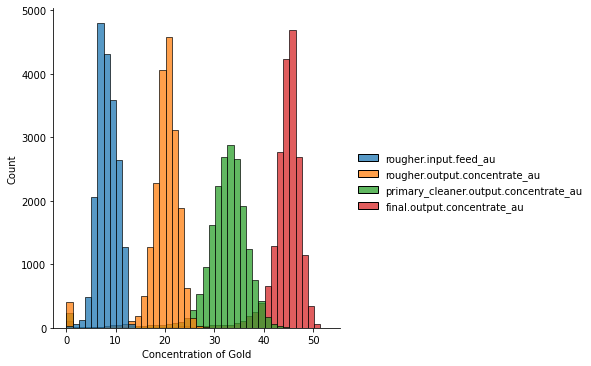

In [50]:
ax = sns.displot(gold_rec_full[ti_rep], multiple = 'dodge')

ax.set(xlabel = "Concentration of Gold")

plt.show()

The concentration of Gold is lowest at the input stage. The concentration increases for each subsequent stage and is highest in the final stage. This is expected because at the final stage much impurities have been taken out from the Gold Ore.

Next, we look at Silver (Ag)

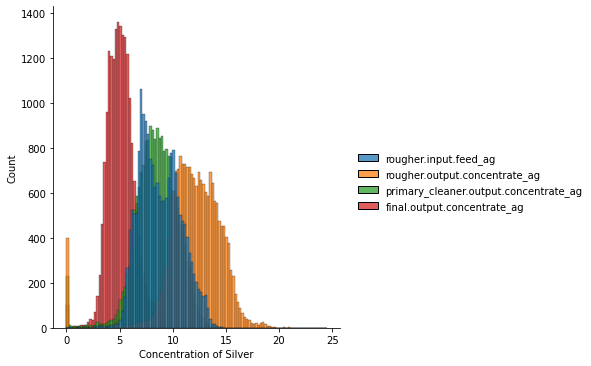

In [52]:
xi_rep = ['rougher.input.feed_ag','rougher.output.concentrate_ag',
                          'primary_cleaner.output.concentrate_ag',
                          'final.output.concentrate_ag']

ax = sns.displot(gold_rec_full[xi_rep], multiple = 'dodge')

#sns.displot(gold_rec_full[ti_rep], multiple = 'stack')

ax.set(xlabel = "Concentration of Silver")

plt.show()

The concentration of Silver is highest in the rougher stage, next is the input stage, then the primary stage, and lowest in the final output stage. 

Lastly, we take a look at Lead (Pb)

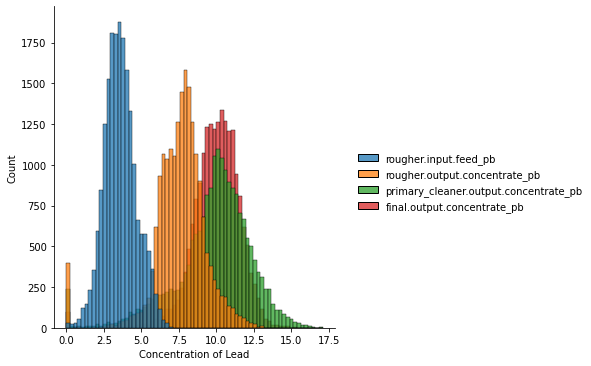

In [53]:
pb_data = ['rougher.input.feed_pb','rougher.output.concentrate_pb',
                          'primary_cleaner.output.concentrate_pb',
                          'final.output.concentrate_pb']

ax = sns.displot(gold_rec_full[pb_data], multiple = 'dodge')

#sns.displot(gold_rec_full[ti_rep], multiple = 'stack')

ax.set(xlabel = "Concentration of Lead")

plt.show()

The concentration of Lead is lowest in the input stage, it increases in each subsequent stage, and is highest in the final output stage.

### Feed particle size distribution

To calculate the distribution of the feed particle size, we would look at both the training and test set

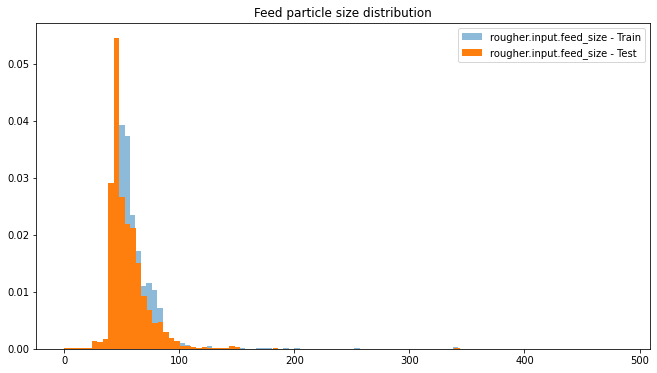

In [29]:
plt.figure(figsize=(11, 6))

plt.hist(gold_rec_train['rougher.input.feed_size'], bins = 100, alpha = 0.5, density = True,
         label = 'rougher.input.feed_size - Train')

plt.hist(gold_rec_test['rougher.input.feed_size'], bins = 100, alpha = 1, density = True,
        label = 'rougher.input.feed_size - Test')

plt.title('Feed particle size distribution')
plt.legend(loc = 'upper right')

plt.show()

From the histogram plot, the distributions of the feed particle are similar in the training dataset, and the test dataset

### Total concentrations of all metals at all stages

Next, we will determine the concentration of all the metals at the raw feed stage, the rougher stage, and the final (output) stage

In [30]:
raw_feed_conc = ["rougher.input.feed_au", "rougher.input.feed_ag", "rougher.input.feed_pb",
                         "rougher.input.feed_sol"]

rougher_conc = ["rougher.output.concentrate_au","rougher.output.concentrate_ag", 
                        "rougher.output.concentrate_pb", "rougher.output.concentrate_sol"]

output_conc = ["final.output.concentrate_au", "final.output.concentrate_ag", 
               "final.output.concentrate_pb", "final.output.concentrate_sol" ]

#adding the values along the same observations

raw_feed_sum = gold_rec_full[raw_feed_conc].sum(axis = 1).reset_index()

rougher_conc_sum = gold_rec_full[rougher_conc].sum(axis = 1).reset_index()

output_conc_sum = gold_rec_full[output_conc].sum(axis = 1).reset_index()

Plotting a Histogram for the sums of the concentration of the metals in the raw_feed stage, rougher stage, and output stage

For the raw_feed stage:

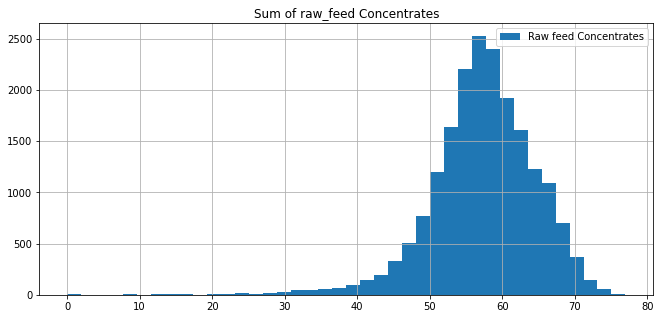

In [31]:
raw_feed_sum.hist(bins = 40, label = "Raw feed Concentrates", figsize = (11, 5))
plt.title("Sum of raw_feed Concentrates")
plt.legend(loc = "upper right")
plt.show()

The concentration of the raw feed is highest at 55, when the count is a little above 2500. 

For the rougher stage:

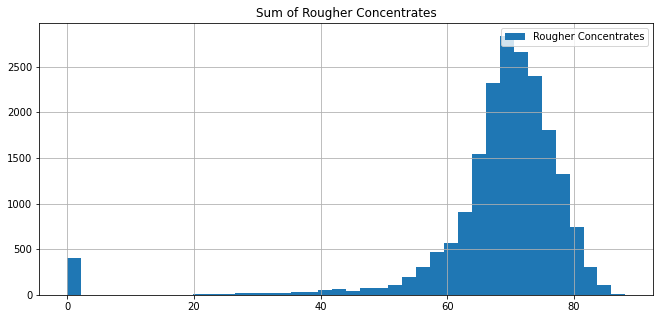

In [32]:
rougher_conc_sum.hist(bins = 40, label = "Rougher Concentrates", figsize = (11, 5))
plt.title("Sum of Rougher Concentrates")
plt.legend(loc = "upper right")
plt.show()

The count of the metals in the Rougher stage starts when the concentration is 20. The count of the metals  increases gradually till the concentration gets to 60, then sharply till the concentration peaks at 70. Afterwards, the count drops sharply beyond the concentration of 70 and ends at 85 when it is zero again.
The concentration in this stage is higher than the raw feed stage, due to the removal of some impurities. There are zero values seen in the rougher stage.

For the final output stage:

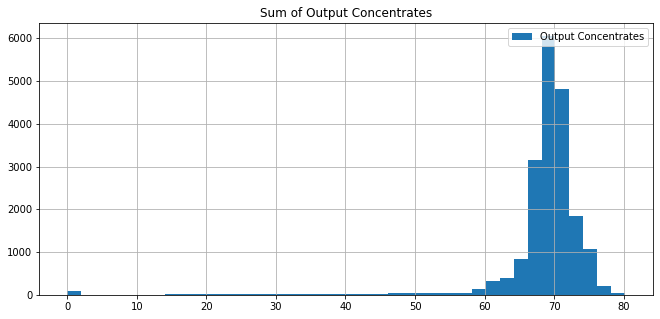

In [33]:
output_conc_sum.hist(bins = 40, label = "Output Concentrates", figsize = (11, 5))
plt.title("Sum of Output Concentrates")
plt.legend(loc = "upper right")
plt.show()

In the final output stage, the concentration of the metals is highest. The count of the metals begins when the concentation is 15, and stays constant till the concentration is 45. It increases gradually till 65. From 65 the count rises sharply and peaks at 6000 when the concentration is 70. Beyond 70 the count drops abruptly, and ends at 80. 

However, there are some zero values still present in the final output stage. These Zero values are outliers, therefore, they will be taken out. 

In [50]:
#Ensuring that the sum of the concentration at each stage is greater than 0

gold_rec_train_model = gold_rec_train[gold_rec_train[raw_feed_conc].sum(axis = 1) > 0.0001]

gold_rec_train_model = gold_rec_train[gold_rec_train[rougher_conc].sum(axis = 1) > 0.0001]

gold_rec_train_model = gold_rec_train[gold_rec_train[output_conc].sum(axis = 1) > 0.0001]

gold_rec_train_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14091 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14091 non-null  float64
 1   final.output.concentrate_pb                         14091 non-null  float64
 2   final.output.concentrate_sol                        14091 non-null  float64
 3   final.output.concentrate_au                         14091 non-null  float64
 4   final.output.recovery                               14091 non-null  float64
 5   final.output.tail_ag                                14091 non-null  float64
 6   final.output.tail_pb                                14091 non-null  float64
 7   final.output.tail_sol                               14091 non-null  float64
 8   final.output.tail_au                             

Identifying our targets in the training dataset

In [51]:
gold_rec_train_targets = gold_rec_train_model[["rougher.output.recovery", "final.output.recovery"]]
                                       
                                       
print(gold_rec_train_targets.shape)


(14091, 2)


The test dataset has fewer features, therefore, we will make the features of the training dataset the columns that appear in the test set

In [52]:
gold_rec_train_features = gold_rec_train_model.loc[:, list(gold_rec_test.columns)]

gold_rec_train_features.shape

(14091, 52)

For the test set, we will have to get information concerning rougher.output.recovery', 'final.output.recovery', 'rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol' which are missing from it. We can get this information from the full set. This is done so that we can later eliminate the outliers.

In [53]:
subset = ['rougher.output.recovery', 'final.output.recovery', 'rougher.output.concentrate_au', 
          'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
         'final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
          'final.output.concentrate_sol']

#gathering the names of missing columns from the test set

sub_gold_rec_full = gold_rec_full.loc[:, list(subset)]

sub_gold_rec_full.head()

,rougher.output.recovery,final.output.recovery,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol
date,,,,,,,,,,
2016-01-15 00:00:00,87.107763,70.541216,19.793808,11.500771,7.101074,28.029297,42.192020,6.055403,9.889648,5.507324
2016-01-15 01:00:00,86.843261,69.266198,20.050975,11.615865,7.278807,28.067063,42.701629,6.029369,9.968944,5.257781
2016-01-15 02:00:00,86.842308,68.116445,19.737170,11.695753,7.216833,27.454037,42.657501,6.055926,10.213995,5.383759
2016-01-15 03:00:00,87.226430,68.347543,19.320810,11.915047,7.175616,27.341277,42.689819,6.047977,9.977019,4.858634
2016-01-15 04:00:00,86.688794,66.927016,19.216101,12.411054,7.240205,27.041023,42.774141,6.148599,10.142511,4.939416


We have gotten the columns that are missing from our test dataset. Therefore, we can merge them with gold_rec_test, which is the original dataset. The merge will be done on the date column.

In [54]:
gold_rec_test_new = gold_rec_test.merge(sub_gold_rec_full, on ="date", how = "left")

gold_rec_test_new.shape

(5856, 62)

Taking out the outliers from the test dataset. 

In [56]:
#Ensuring that the sum of the concentration at each stage is greater than 0

gold_rec_test_model = gold_rec_test_new[gold_rec_test_new[raw_feed_conc].sum(axis = 1) > 0.0001]

gold_rec_test_model = gold_rec_test_new[gold_rec_test_new[rougher_conc].sum(axis = 1) > 0.0001]

gold_rec_test_model = gold_rec_test_new[gold_rec_test_new[output_conc].sum(axis = 1) > 0.0001]

gold_rec_test_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5250 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 62 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5250 non-null   float64
 1   primary_cleaner.input.depressant            5250 non-null   float64
 2   primary_cleaner.input.feed_size             5250 non-null   float64
 3   primary_cleaner.input.xanthate              5250 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5250 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5250 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5250 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5250 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5250 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5250 non-null

Outliers were taken out becaue we want to have a similar distribution in both the training and test datasets

We can now define our test targets:

In [57]:
gold_rec_test_targets = gold_rec_test_model[["rougher.output.recovery", "final.output.recovery"]]
                                       
                                       
gold_rec_test_targets.shape

(5250, 2)

For our features, we want only the columns present in our original test set:

In [58]:
gold_rec_test_features = gold_rec_test_model.loc[:, list(gold_rec_test.columns)]

gold_rec_test_features.shape

(5250, 52)

We have successfully analyzed metal concentrations throughout the stages, particle feed size, total concentrations though different stages and we have eliminated outliers.

## Building Models

To make predictions on the amount of gold recovered from gold ore, we will calculate the symmetric Mean Percentage Error (sMAPE). sMAPE equally takes into account the scale of both the target and the prediction.

Therefore, we will write a function to calculate sMAPE, after which we will determine the best model. sMAPE is a calculation of percentage error, so, the closer the value is to 0 the better.

              

In [59]:
def finalsMAPE(targ, pred): #creates a function called finalSMAPE that target and predictions as arguments
    sMAPE_rougher = (np.mean((np.abs(targ.iloc[:,0] - pred[:, 0]) /\
                              ((np.abs(targ.iloc[:,0]) + np.abs(pred[:,0])) / 2))) * 100)
    #rougher stage sMAPE formula
    sMAPE_final = (np.mean((np.abs(targ.iloc[:,1] - pred[:, 1]) /\
                            ((np.abs(targ.iloc[:,1]) + np.abs(pred[:,1])) / 2))) * 100)
    #final stage sMAPE formula
    final_sMAPE = sMAPE_rougher * 0.25 + sMAPE_final * 0.75 #final sMAPE formula
    return final_sMAPE

sMAPE_score = make_scorer(finalsMAPE, greater_is_better = False)
#makes finalsMAPE formula the scorer for our models, the smaller the better since it is a measure of error

We move to the next step, which is the training of models. However, before buiding the models, a baseline model will be created against which we would compare the performance of our models. 

Creating a baseline model

In [61]:
dum_score = DummyRegressor()
dum_val_score = cross_val_score(dum_score, gold_rec_train_features, gold_rec_train_targets, 
                                scoring = sMAPE_score, cv = 5)
print(dum_val_score.mean())

-10.954205363322723


Building a Linear Regression model

In [63]:
lin_reg = LinearRegression()
lin_reg_score = cross_val_score(lin_reg, gold_rec_train_features, gold_rec_train_targets, 
                                scoring = sMAPE_score, cv = 5)
print(lin_reg_score.mean())

-11.422964677907846


The next is Decision Tree. We will find which max depth works best:


In [64]:
for depth in range(1, 13):
    dec_tree = DecisionTreeRegressor(max_depth = depth, random_state = 12345)
    dec_tree_score = cross_val_score(dec_tree, gold_rec_train_features, gold_rec_train_targets,
                                scoring = sMAPE_score, cv=5)
    print('Max_Depth=', depth, ':', dec_tree_score.mean())

Max_Depth= 1 : -11.187661006573352
Max_Depth= 2 : -10.45950852153352
Max_Depth= 3 : -10.896283406558483
Max_Depth= 4 : -10.485287406841024
Max_Depth= 5 : -10.58503915153971
Max_Depth= 6 : -11.553664547876153
Max_Depth= 7 : -11.986204287034912
Max_Depth= 8 : -14.118937428062207
Max_Depth= 9 : -15.702617172031633
Max_Depth= 10 : -19.725697401179396
Max_Depth= 11 : -21.34463691664514
Max_Depth= 12 : -21.3953030870582


Lastly, we test the Random Forest model. For the Random Forest model, we have a combination of several trees. Therefore, we have to find the combination of the maximum depth (max_depth) and number of trees (n_estimators) that works best

In [46]:
for i in range(1, 13):
    ran_for = RandomForestRegressor(n_estimators=20, max_depth = i, random_state = 12345)
    ran_for_score = cross_val_score(ran_for, gold_rec_train_features, gold_rec_train_targets, 
                                    scoring = sMAPE_score, cv=5)
    print('Max_Depth=', i, ':', ran_for_score.mean())
        
        


Max_Depth= 1 : -11.051977223128935
Max_Depth= 2 : -10.446727079754721
Max_Depth= 3 : -10.235344338670783
Max_Depth= 4 : -9.976039825058583
Max_Depth= 5 : -9.751902768850735
Max_Depth= 6 : -9.773070622619178
Max_Depth= 7 : -9.88574170848073
Max_Depth= 8 : -10.22726901641187
Max_Depth= 9 : -10.626445141809706
Max_Depth= 10 : -10.932185117631409
Max_Depth= 11 : -10.668189853807476
Max_Depth= 12 : -10.7757730090101


Out of all these models, the one that works best is the Random Forest Regressor with a max depth of 5 and 20 estimators. So we can now go ahead and train the model with scaled features then test it on the test set

In [65]:
#scaling
scaler = StandardScaler()#scaler function
scaler.fit_transform(gold_rec_train_features)#fits the scaled features from the train set
scaler.transform(gold_rec_test_features )#scales the test features

array([[ 1.9619546 ,  1.81828474,  1.23513754, ..., -0.41161728,
         1.23872944,  0.19044759],
       [ 2.07838841,  1.8166084 ,  1.23513754, ..., -0.41481854,
         0.94603857,  0.18746569],
       [ 2.07502822,  1.1923902 ,  0.75685725, ..., -0.40626397,
         0.94168486,  0.16569922],
       ...,
       [ 0.95611268,  2.11533658,  1.21883215, ..., -0.41169442,
        -1.83823742,  0.24247137],
       [ 1.17321626,  1.95065566,  1.21883215, ..., -0.4090669 ,
        -1.83292132,  0.17839057],
       [ 1.22037505,  1.81909585,  1.21883215, ..., -0.419308  ,
        -1.83709269,  0.16184044]])

Final testing:

In [66]:
model = RandomForestRegressor(n_estimators = 20, max_depth=5, random_state = 12345)
#Random Forest Regression model with 20 estimators and max_depth 4
model.fit(gold_rec_train_features, gold_rec_train_targets)#training the model with the scaled features and target
predictions = model.predict(gold_rec_test_features)#gets predictions based on test features 
print(finalsMAPE(gold_rec_test_targets, predictions))#prints final sMAPE 

7.970254562451347


## Conclusion

This project was done to develop models that would be used to predict the amount of gold recovered from gold ore. 

We analyzed metal concentrations through the different purification stages and found that Lead concentrations are lowest in the input stage, followed by the rougher stage, then the primary cleaner and highest in the final output stage.
Silver concentrations are highest in the rougher stage, next is the input stage, then the primary stage. The concentration of Silver is lowest in the final output stage.

Gold concentrations are lowest in the input stage, and increased for each subsequent stage, and was highest in the final output stage.

The particle feed size distributions was analyzed for the train and test set and  we found them to be similar.

Lastly, we tested several models for accuracy on predictions, and picked the best model being the Random Forest Regressor with max depth 5 and 20 estimators.

The Random Forest model that was selected ( max_depth, 5, and 20 estimators) had a Final sMAPE value of 7.97%
